<a href="https://colab.research.google.com/github/twisha-k/Python_notes/blob/main/28_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 28: Meteorite Landings - Annotated Bar Graphs

### Teacher-Student Activities

In the previous classes, we learnt how to create bar graphs, i.e., both the count plots and histograms. In this class, we will learn how to annotate (or label) bar graphs (both count plots and histograms) to display the essential parameters such as count and percentages in the graph itself.

Let's quickly rush through the activities we covered in the previous class and begin this class from **Activity 1: Count Plot Without Annotations** section.



---

#### Recap

Dataset Link (don't click on it):

https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv


In [ ]:
# Below are the activities that have been covered in the previous class.
# 1. Import the necessary libraries for this class and create a DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

met_df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv')

# 2. Find the number of rows and columns in the DataFrame.
print(met_df.shape)

# 3. Rows containing the year values less than 860 and greater than 2016.
correct_years_df = met_df[(met_df['year'] >= 860) & (met_df['year'] <= 2016)]

# 4. Rows having the 'reclong' values greater than or equal to -180 degrees and less than or equal to 180 degrees.
correct_long_df = correct_years_df[(correct_years_df['reclong'] >= -180) & (correct_years_df['reclong'] <= 180)]

# 5. Rows containing the '0 reclat' and '0 reclong' values from the 'correct_long_df'.
correct_lat_long_df = correct_long_df[~((correct_long_df['reclat'] == 0 ) & (correct_long_df['reclong'] == 0))]

# 6. Indices of the rows having missing mass values.
row_indices = correct_lat_long_df[correct_lat_long_df['mass'].isnull() == True].index

# 7. Missing values in the 'mass' column in the 'correct_lat_long_df' DataFrame with median of mass.
median_mass = correct_lat_long_df['mass'].median()
correct_lat_long_df.loc[row_indices, 'mass'] = median_mass

# 8. Convert the 'year' values into an integer type values.
correct_lat_long_df.loc[:, 'year'] = correct_lat_long_df.loc[:, 'year'].astype('int')

(45716, 10)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


---

#### Activity 1: Count Plot Without Annotations

Recall that in the previous two classes, we learnt to draw the count plots and histograms for all the meteorites fallen on Earth in a year. However, the bars in the count plots and histograms didn't display the exact counts on the graph as you can see in the graphs below.

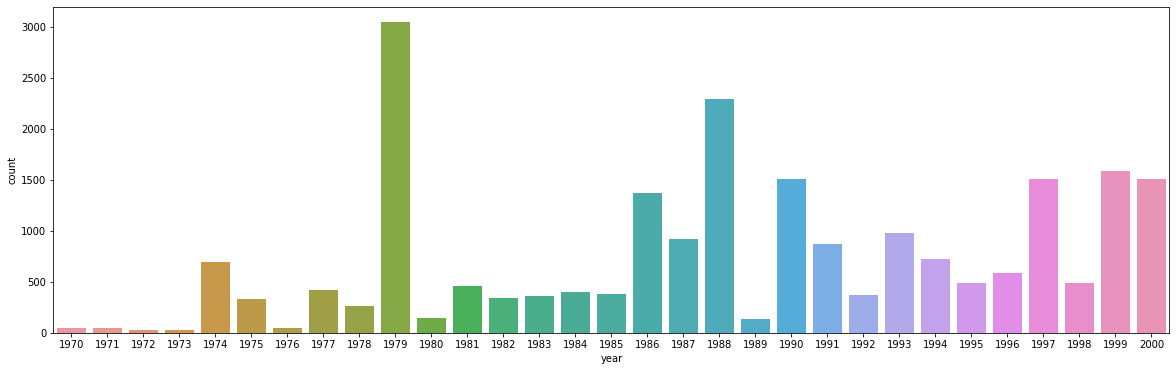

In [ ]:
# Teacher Action: Run the code shown below.
# Non-annotated count plot for the count of the meteorites between the years 1970 & 2000.
import seaborn as sns
plt.figure(figsize=(20, 6))
sns.countplot(x='year', data=correct_lat_long_df[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 2001)])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


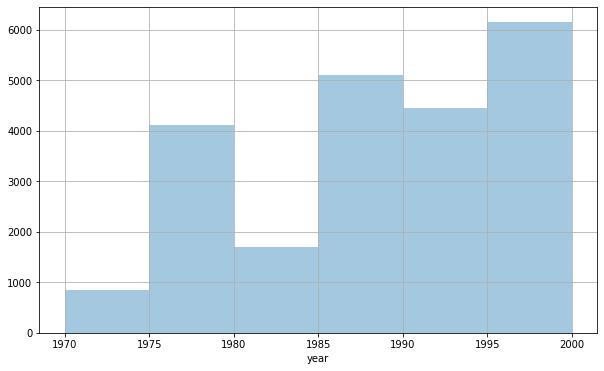

In [ ]:
# Teacher Action: Run the code shown below.
# Non-annotated histogram for the Pandas series containing the year values between 1970 and 2000 including both of them.
plt.figure(figsize=(10, 6))
sns.distplot(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 2001), 'year'], bins=6, kde=False)
plt.grid()
plt.show()

Let's learn how to display the exact figures on the bars in a count plot and a histgram by annotating (or labelling) them.


Let's first annotate the count plot for the year 1970 to 2000 (both inclusive) with the count of the meteorites fallen in the year. The resulting annotated count plot should look like the following:

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/countplot_annotated.png'>

As you can see in the count plot above, there are bars for all the years in the range 1970 to 2000 indicating the count of the meteorites fallen in a year. The numbers on top of the bars show the actual counts. E.g., in the year 1979, a total of 3046 meteorites have fallen on Earth.




---

#### Activity 2: The `patches`

With reference to the `matplotlib.pyplot` module, the bars in the count plots and histograms are considered as rectangles. Each rectangle (or bar) in a count plot and a histogram has a width, height, $x$ and $y$ coordinates as shown in the image below.

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/matplotlib_rectangle.png' width=700>

To create an annotated bar (both histogram and count plot) graph, we first need to get the rectangle attributes using the `patches` keyword along with the following functions:

1. The `get_width()` function returns the width of the rectangle as shown in the image above.

2. The `get_height()` function returns the height of the rectangle as shown in the image above.

3. The `get_x()` function returns the `x` (or left) coordinate of the rectangle as shown in the image above.

4. The `get_y()` function returns the `y` (or bottom) coordinate of the rectangle as shown in the image above.

**Note:**

1. The `angle` and `fill` are two more attributes of a rectanglee which we don't need to know at the moment. We will learn about them whenever we require them.

2. The `patches` keyword works only if the `matplotlib` module is imported.

Let's get the Python list containing the rectangle attributes for the count plot displaying the number of meteorites fallen between 1970 and 2000. Also, let's print the length of the list. The steps to be followed are:

1. Use the `countplot()` function to create a count plot for the meteorites fallen between 1970 and 2000 (both inclusive) and then store the count plot in a variable.

2. Use the `patches` keyword to get the rectangle attributes list. Print the length of the list.

3. Use the `for` loop to print rectangle attributes for reach rectangle.


Rectangle(xy=(-0.4, 0), width=0.8, height=46, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=48, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=31, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=30, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=691, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=336, angle=0)
Rectangle(xy=(5.6, 0), width=0.8, height=51, angle=0)
Rectangle(xy=(6.6, 0), width=0.8, height=421, angle=0)
Rectangle(xy=(7.6, 0), width=0.8, height=262, angle=0)
Rectangle(xy=(8.6, 0), width=0.8, height=3046, angle=0)
Rectangle(xy=(9.6, 0), width=0.8, height=144, angle=0)
Rectangle(xy=(10.6, 0), width=0.8, height=458, angle=0)
Rectangle(xy=(11.6, 0), width=0.8, height=344, angle=0)
Rectangle(xy=(12.6, 0), width=0.8, height=360, angle=0)
Rectangle(xy=(13.6, 0), width=0.8, height=402, angle=0)
Rectangle(xy=(14.6, 0), width=0.8, height=377, angle=0)
Rectangle(xy=(15.6, 0), width=0.8, height=1375, angle=0)
Rectangle(xy=(16.6, 0), width=0.8, height=915, angle=0)
Recta

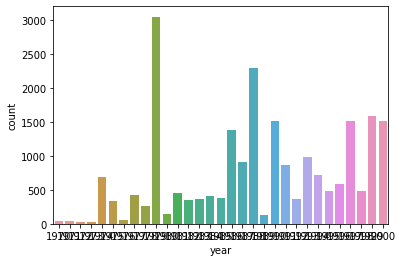

In [ ]:
# Teacher Action: Get the list containing the bar attributes for the count plot displaying the number of meteorites fallen from 1970 to 2000.
import seaborn as sns
cp = sns.countplot(x='year', data=correct_lat_long_df[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 2001)])
for i in cp.patches:
  print(i)

As you can see, the `patches` keyword returns the Python list containing the attributes of each bar (or rectangle) in the count plot along with the countplot (to be ignored at the moment). There are 31 such rectangles, hence we have attributes for 31 rectangles in the `cp.patches` list.

Let's get the `width, height, x` and `y` coordinates of each bar in the above count plot using the `get_width(), get_height(), get_x()` and `get_y()` functions respectively.

In [ ]:
# Teacher Action: Get the height, width, x and y coordinates of each bar in the count plot stored in the 'cp' variable.
for p in cp.patches:
  print("Width =", p.get_width(),
        "\nHeight =", p.get_height(),
        "\nx-coordinate =", p.get_x(),
        "\ny-coordinate =", p.get_y(), "\n")

Width = 0.8 
Height = 46 
x-coordinate = -0.4 
y-coordinate = 0 

Width = 0.8 
Height = 48 
x-coordinate = 0.6 
y-coordinate = 0 

Width = 0.8 
Height = 31 
x-coordinate = 1.6 
y-coordinate = 0 

Width = 0.8 
Height = 30 
x-coordinate = 2.6 
y-coordinate = 0 

Width = 0.8 
Height = 691 
x-coordinate = 3.6 
y-coordinate = 0 

Width = 0.8 
Height = 336 
x-coordinate = 4.6 
y-coordinate = 0 

Width = 0.8 
Height = 51 
x-coordinate = 5.6 
y-coordinate = 0 

Width = 0.8 
Height = 421 
x-coordinate = 6.6 
y-coordinate = 0 

Width = 0.8 
Height = 262 
x-coordinate = 7.6 
y-coordinate = 0 

Width = 0.8 
Height = 3046 
x-coordinate = 8.6 
y-coordinate = 0 

Width = 0.8 
Height = 144 
x-coordinate = 9.6 
y-coordinate = 0 

Width = 0.8 
Height = 458 
x-coordinate = 10.6 
y-coordinate = 0 

Width = 0.8 
Height = 344 
x-coordinate = 11.6 
y-coordinate = 0 

Width = 0.8 
Height = 360 
x-coordinate = 12.6 
y-coordinate = 0 

Width = 0.8 
Height = 402 
x-coordinate = 13.6 
y-coordinate = 0 

Width = 0

So as you can see, we have retrieved the attributes of each rectangle in the count plot created for the `correct_lat_long_df[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 2001)]` DataFrame.

Now, let's annotate them.

---

#### Activity 3: The `annotate()` Function^^

To annotate a bar in either a histogram or a count plot, you need to use the `annotate()` function. It takes several parameters as inputs. But for the time being, we will pass only the following parameters:

1. `text` - It is the label (or annotation) that you would like to put in the graph. Here, we will put the height of each bar graph as the labels. It is supposed to be a string value. The `text` parameter also supports integer values but as a best practice, always use only the string values.

2. `xy` - It is the position (`x` and `y` coordinates) of the bar where a label (or annotation) is supposed to be applied. The coordinates need to be passed as a tuple.

3. `ha` or `horizontalalignment` - As the name suggests, it controls the horizontal alignment of the label (or annotation). You can provide the following values for horizontal alignment:

  - `left` - It puts a label on the right-hand side of the `x` coordinate. This is counter-intuitive.

  - `right` - It puts a label on the left-hand side of the `x` coordinate. This is again counter-intuitive.

  - `center` - It puts a label at equal distances w.r.t. the `x` coordinate.

4. `va` or `verticalalignment` - As the name suggests, it controls the vertical alignment of the label (or annotation).

  - `top` - It puts a label at bottom w.r.t. the `y` coordinate. This is counter-intuitive.

  - `center` - It puts a label at equal distances w.r.t. the `y` coordinate.

  - `bottom` - It puts a label at top w.r.t. the `y` coordinate. This is counter-intuitive.

**Syntax:** `some_plot.annotate(text, xy, ha, va)` where `some_plot` is the variable storing the `matplotlib.pyplot` graph.

Now, let's annotate the count plot for the meteorites fallen between the years 1970 and 2000 (including 2000).


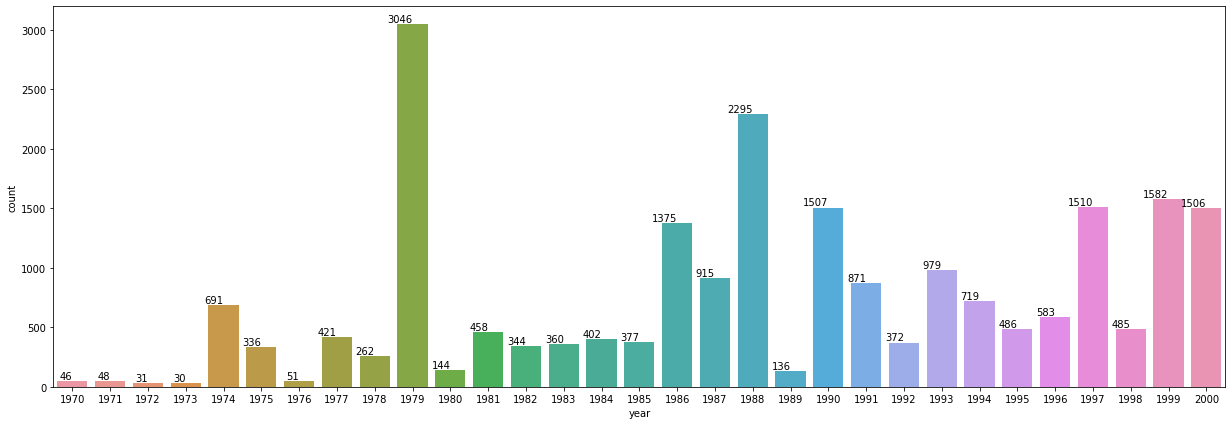

In [ ]:
# Teacher Action: Annotate bars in the count plot for the meteorites fallen between the years 1970 and 2000 (including both).
plt.figure(figsize=(21, 7))
cp = sns.countplot(x='year', data=correct_lat_long_df[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 2001)])
for p in cp.patches:
  cp.annotate(str(p.get_height()), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
              ha='right', va='bottom')

In the above code, we iterate through each patch to get the attributes for each bar in the count plot.

For each bar:

- We annotate (or label) the bar height to the bar. The bar height is essentially the count of meteorites fallen to Earth in a year. We convert it into a string value using the `str()` function to pass it as the value for the `text` parameter in the `annotate()` function.

- Using the `get_x()` function, we get the x-coordinate of the bar to specify the horizontal position of the label to be placed.

- Using the `get_height()` function again, we get the height of the bar which we use to specify the vertical position of the label to be placed.

- Using the `get_width()` function, we get the width of the bar which we have added to the value returned by the `get_x()` function to adjust the horizontal position of the label to be placed. The horizontal and vertical positions are passed as the values of the `xy` parameter.

- We have further adjusted the position of the label to be placed using the `ha` and `va` parameters.

You should play with the `xy`, `ha` and `va` parameters by changing their values to truly understand the alignment behaviour of an annotation (or label).

Now, let's annotate a histogram created using the `displot()` function of the `seaborn` module.

---

#### Activity 4: Annotate `seaborn` Histogram^

For a histogram created using the `seaborn` module, the same process is followed. Recall that to create a histogram using the `seaborn` module, you need to use the `distplot()` function with the `kde` parameter set equal to `False`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


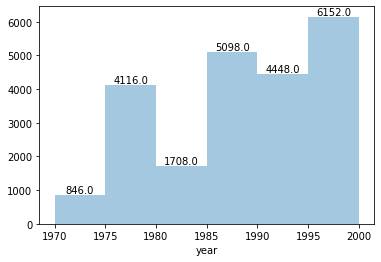

In [ ]:
# Student Action: Annotate a histogram created using the 'distplot()' function.
import seaborn as sns
dp=sns.distplot(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 2001),'year'],bins=6,kde=False)
for i in dp.patches:
  dp.annotate(str(i.get_height()), xy=(i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


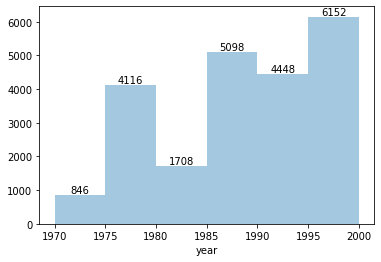

In [ ]:
import seaborn as sns
dp=sns.distplot(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 2001),'year'],bins=6,kde=False)
for i in dp.patches:
  dp.annotate(str(int(i.get_height())), xy=(i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

Therefore,

- 846 meteorites fell on Earth from 1970 to 1975 (excluding 1975)

- 4116 meteorites fell on Earth from 1975 to 1980 (excluding 1980)

- 1708 meteorites fell on Earth from 1980 to 1985 (excluding 1985)

- 5098 meteorites fell on Earth from 1985 to 1990 (excluding 1990)

- 4448 meteorites fell on Earth from 1990 to 1995 (excluding 1995)

- 6152 meteorites fell on Earth from 1995 to 2000 (**including** 2000)


The values in the annotations are floating point values convetered to the string values. Let's first convert them into the integer values before converting them to the string values to avoid `0` after the decimal point.

---

#### Activity 5: Annotating `matplotlib.pyplot` Histogram^^^

The annotation of a histogram created using the `hist()` function which exists in the `matplotlib.pyplot` module is slightly different. Let's jump in right away without going too much into the theory.

Let's create a histogram for the meteorites fallen on Earth between 1970 and 2000 (both inclusive) using the `hist()` function and store it in a variable. Let's keep the bin size 6 because we want to compare this histogram with the one created using the `distplot()` function.

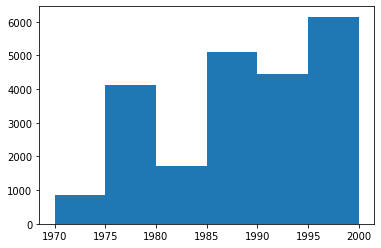

In [ ]:
# Student Action: Using the 'hist()' function, create a histogram for the meteorites fallen on Earth between 1970 & 2000 (both inclusive)
# Store the histogram in a variable.
histogram=plt.hist(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 2001),'year'],bins=6)

# Keep the bin size 6 because we want to compare the histogram with the one created using the 'distplot()' function.


The `plt.hist()` function returns a tuple containing 3 items. Therefore, the value stored in the `hgram` variable is a tuple containing 3 items. They are:

1. The height of the bars in the histogram.

2. The $x-$coordinates on the $x-$axis of the histogram.

3. The attributes for each bar (or rectangle) in the histogram.

In [ ]:
# Student Action: Verify whether the 'hgram' variable stores a tuple or not. Also, print the items of the tuple stored in the 'hgram' variable.
type(histogram),len(histogram)

(tuple, 3)

In [ ]:
histogram

(array([ 846., 4116., 1708., 5098., 4448., 6152.]),
 array([1970., 1975., 1980., 1985., 1990., 1995., 2000.]),
 <a list of 6 Patch objects>)

As you can see, the `hgram` variable indeed stores a tuple.

The list containing the attributes of rectangles (or bars) such as width, height, $x$ and $y$ coordinates, in the histogram exists at index 2 of the tuple contained in the `hgram` variable. Let's print these rectangle attributes.

In [ ]:
# Student Action: Print the rectangle (or bar) attributes of the histogram stored in the 'hgram' variable.
for i in histogram[2]:
  print(i.get_width(),i.get_height(),i.get_x(),i.get_y())

5.0 846.0 1970.0 0.0
5.0 4116.0 1975.0 0.0
5.0 1708.0 1980.0 0.0
5.0 5098.0 1985.0 0.0
5.0 4448.0 1990.0 0.0
5.0 6152.0 1995.0 0.0


Now, let's annotate the `matplotlib.pyplot` histogram using the `annotate()` function.

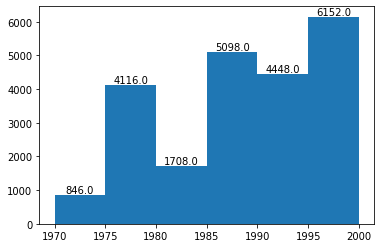

In [ ]:
# Student Action: Annotate the histogram stored in the 'hgram' variable.
import seaborn as sns
hp=plt.hist(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 2001),'year'],bins=6)
for i in hp[2]:
  plt.annotate(str(i.get_height()), xy=(i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

The count of the meteorites fallen, in the above histogram are float values. Let's convert them first into integer values and then convert them into string values.

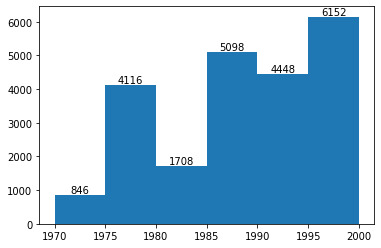

In [ ]:
# Student Action: Convert the count values into the integer values.
import seaborn as sns
hp=plt.hist(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 2001),'year'],bins=6)
for i in hp[2]:
  plt.annotate(str(int(i.get_height())), xy=(i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')



As you can see, now we have integer values annotated to the bars in the histogram.

So this is all about bar graphs and histograms. In the next class, we will learn some cool facts about meteorites. The next class will be a little more theoretical. Make sure that you have revised the previous lessons thoroughly before the next class.

---